<div style="float: right; width: 70%; height: 200px;">
  <div style="position: relative; top: 20%;padding-right:20%;">
  <div style="font-size:280%;font-weight: bold;padding-top: 20px;"> MARS</div>
  <div style="font-size:150%;font-weight: bold;padding-top: 20px;color: rgba(0 , 0 , 0 , 0.5);"> Plot inSight Data</div>
  </div>
</div>


In [2]:
import os

import numpy as np
import obspy
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from scipy import signal, fft
import pprint as pp

import utils

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 20, 5
plt.rcParams['lines.linewidth'] = 0.5

#%load_ext autoreload
#%autoreload 1
#%matplotlib widget

In [14]:
## load inSight data to solar
solar = utils.Solar('VF', 'B').get_solar()
#pp.pprint(solar)

trace = solar['S0986c']['VEL']
traceE = trace[0].copy()
traceN = trace[1].copy()
traceZ = trace[2].copy()

data = traceZ.data
npts = traceZ.stats.npts
delta = traceZ.stats.delta
fs = traceZ.stats.sampling_rate
xticks = np.arange(0, npts*delta, delta)

In [4]:
trace

3 Trace(s) in Stream:
XB.ELYSE.02.BHZ | 2021-09-05T04:48:58.102000Z - 2021-09-05T06:48:58.002000Z | 20.0 Hz, 143999 samples
XB.ELYSE.02.BHN | 2021-09-05T04:48:58.102000Z - 2021-09-05T06:48:58.002000Z | 20.0 Hz, 143999 samples
XB.ELYSE.02.BHE | 2021-09-05T04:48:58.101000Z - 2021-09-05T06:48:58.001000Z | 20.0 Hz, 143999 samples

## 自相关

In [13]:
## 互相关

## load inSight data to solar
solars = utils.Solar('2.4', 'B').get_solar()
ZZ = []
#pp.pprint(solar)
for solar in solars:
    
    trace = solars[solar]['VEL']
    traceE = trace[0].copy()
    traceN = trace[1].copy()
    traceZ = trace[2].copy()

    ZZ.append(np.correlate(traceZ.data, traceZ.data, 'full'))
    # NZ = np.correlate(traceN.data, traceZ.data, 'full')
    # EN = np.correlate(traceE.data, traceN.data, 'full')
    # ZE = np.correlate(traceZ.data, traceE.data, 'full')

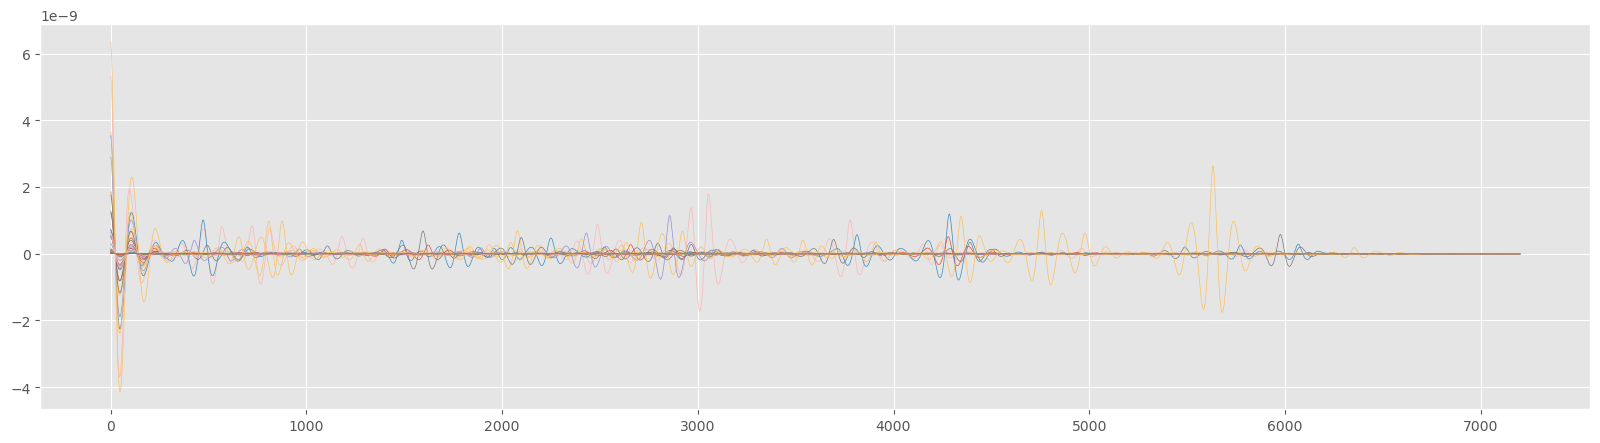

In [38]:

for i, data in enumerate(ZZ):
    xticks = np.arange(0, len(data[(len(data)//2):])*delta, delta)
    #print(data[len(data)//2:].shape)
    plt.plot(xticks, data[(len(data)//2):])

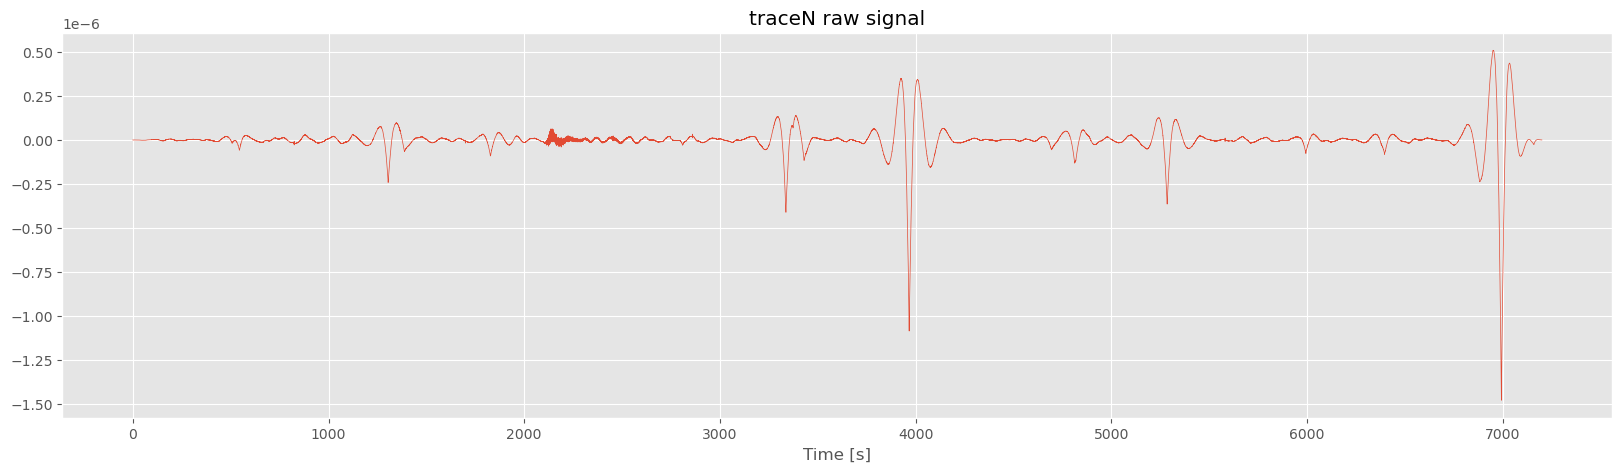

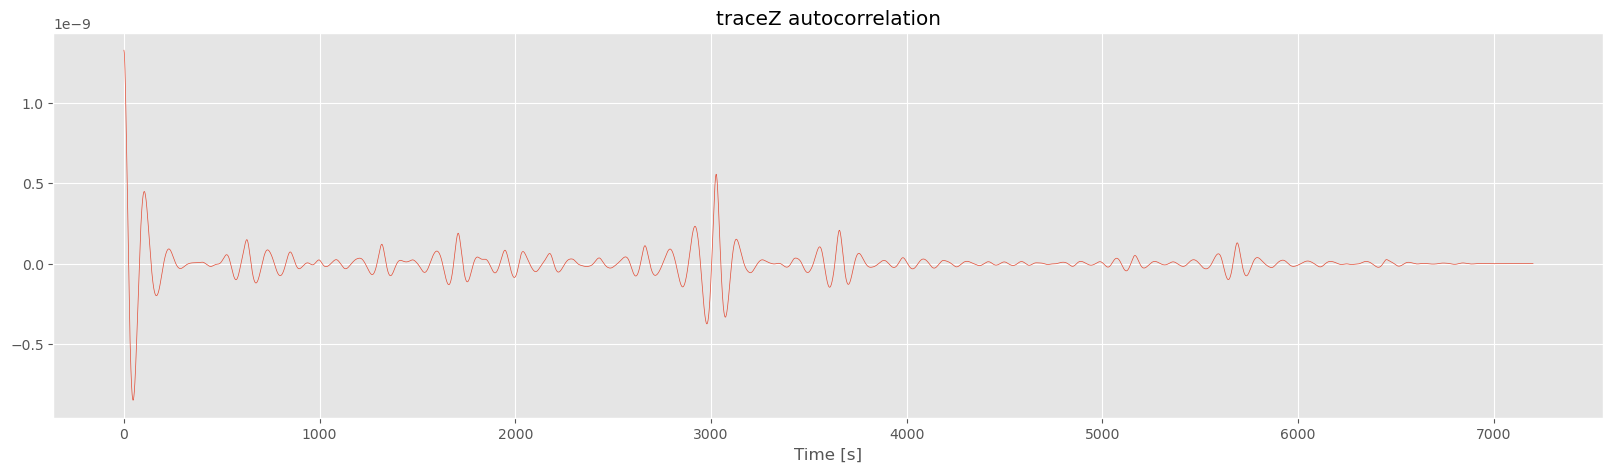

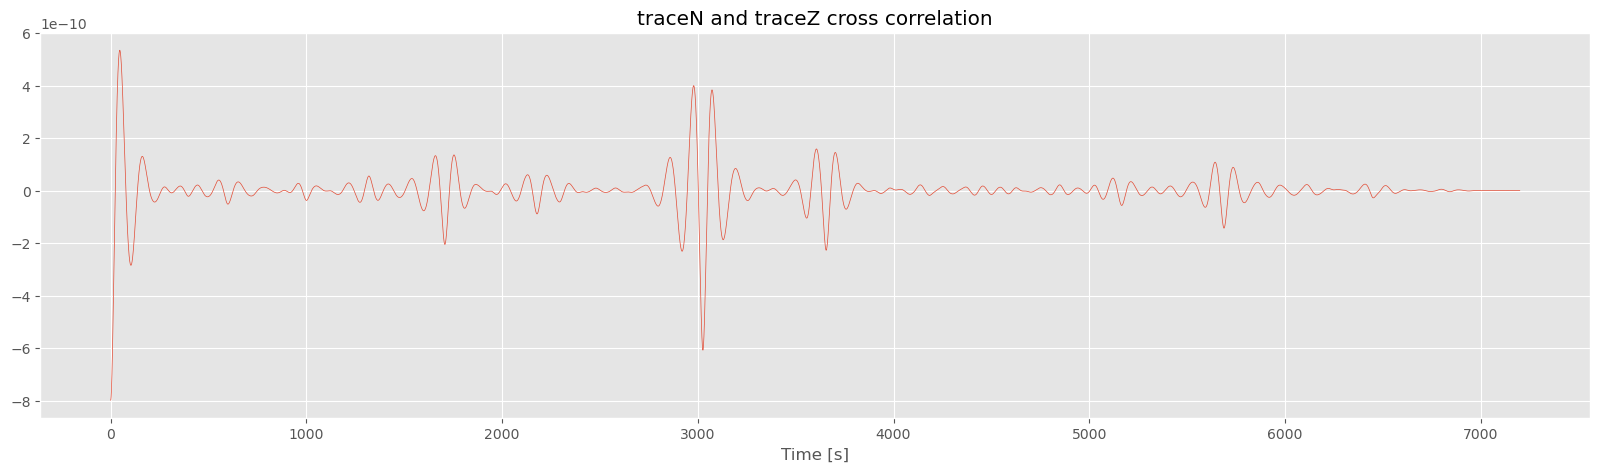

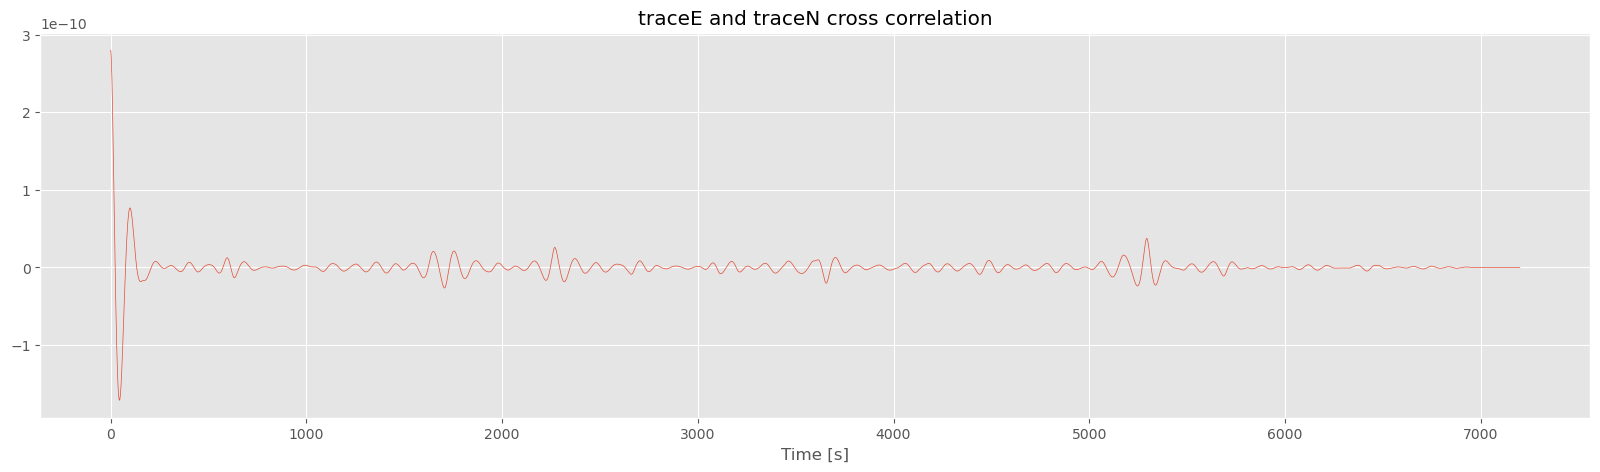

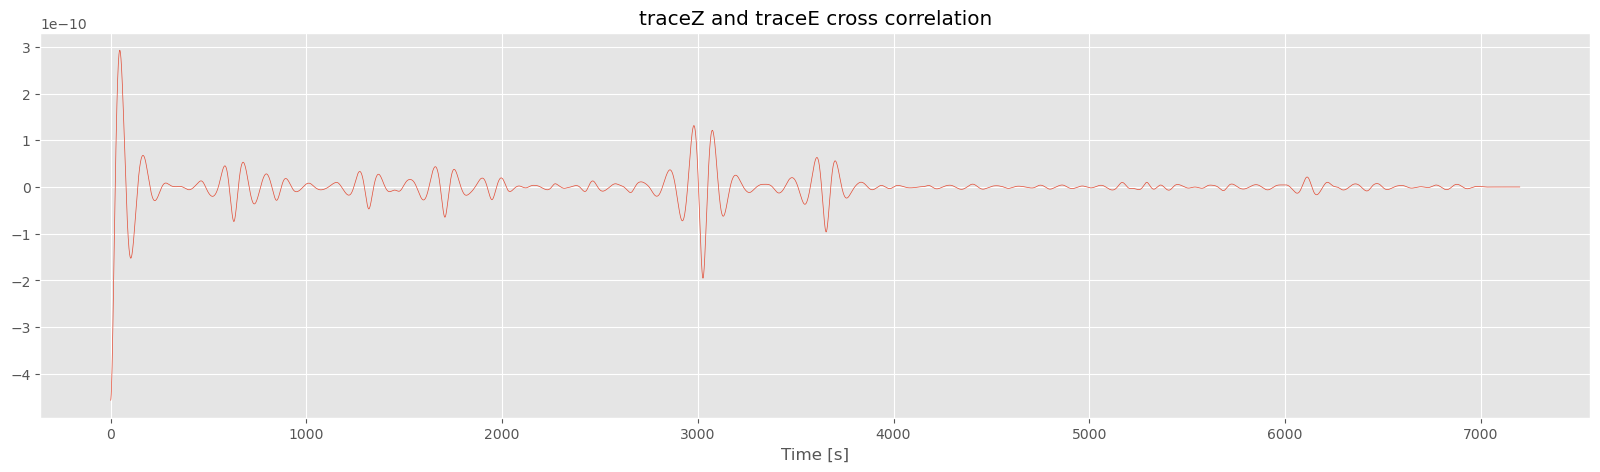

traceE_traceN_cross_correlation.png
traceN_traceZ_cross_correlation.png
traceZ_autocorrelation.png
traceZ_raw.png
traceZ_traceE_cross_correlation.png


0

In [25]:
## 互相关
ZZ = np.correlate(traceZ.data, traceZ.data, 'full')
NZ = np.correlate(traceN.data, traceZ.data, 'full')
EN = np.correlate(traceE.data, traceN.data, 'full')
ZE = np.correlate(traceZ.data, traceE.data, 'full')

fig = plt.figure()
plt.plot(xticks, traceZ)
plt.xlabel('Time [s]'); plt.title('traceN raw signal'); plt.savefig('traceZ_raw.png'); plt.show()
plt.plot(xticks, ZZ[len(ZZ)//2:])
plt.xlabel('Time [s]'); plt.title('traceZ autocorrelation'); plt.savefig('traceZ_autocorrelation.png'); plt.show()
plt.plot(xticks, NZ[len(NZ)//2:])
plt.xlabel('Time [s]'); plt.title('traceN and traceZ cross correlation'); plt.savefig('traceN_traceZ_cross_correlation.png'); plt.show()
plt.plot(xticks, EN[len(EN)//2:])
plt.xlabel('Time [s]'); plt.title('traceE and traceN cross correlation'); plt.savefig('traceE_traceN_cross_correlation.png'); plt.show()
plt.plot(xticks, ZE[len(ZE)//2:])
plt.xlabel('Time [s]'); plt.title('traceZ and traceE cross correlation'); plt.savefig('traceZ_traceE_cross_correlation.png'); plt.show()

os.system("rm -rf fig.tar.gz")
os.system("tar -zcvf fig.tar.gz trace*.png")
os.system("scp fig.tar.gz mac:~")

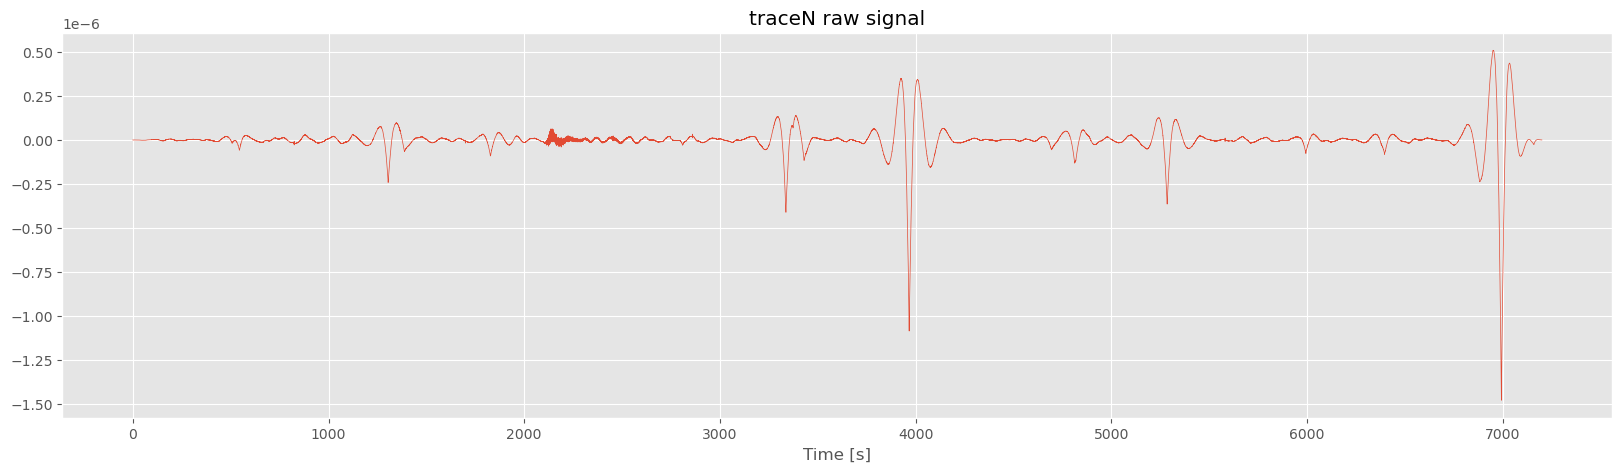

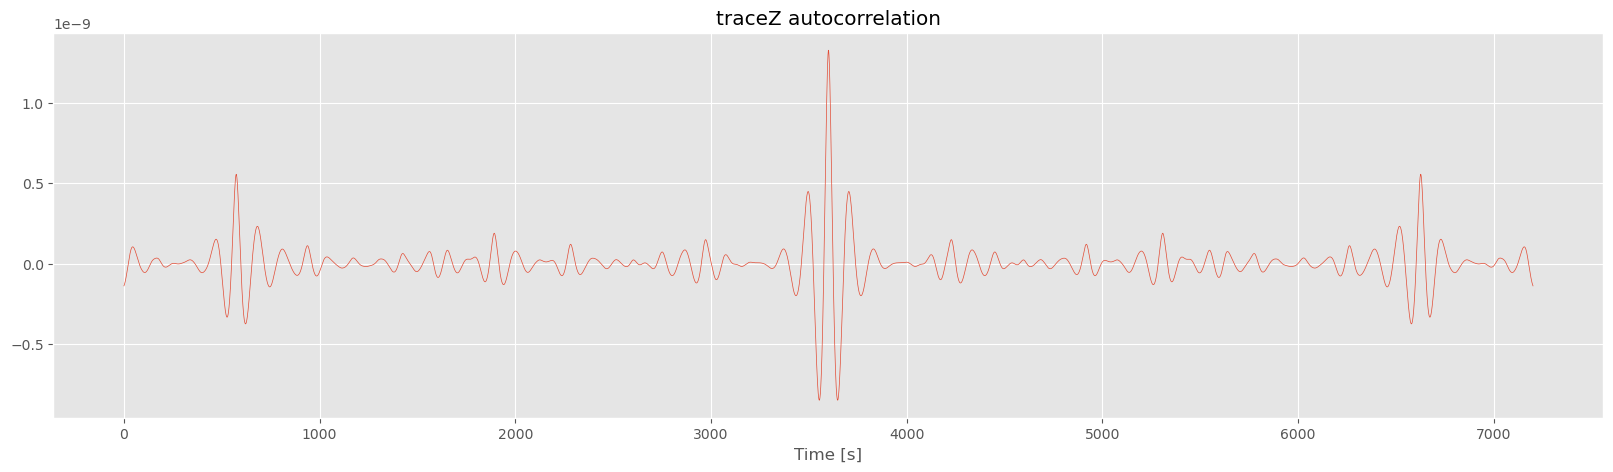

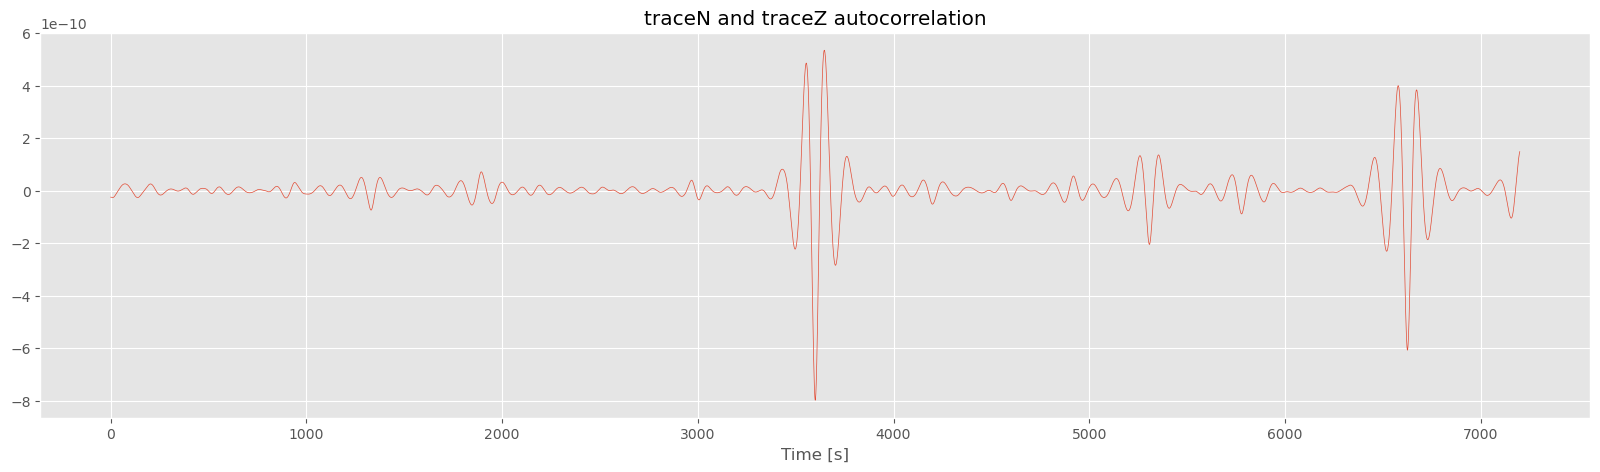

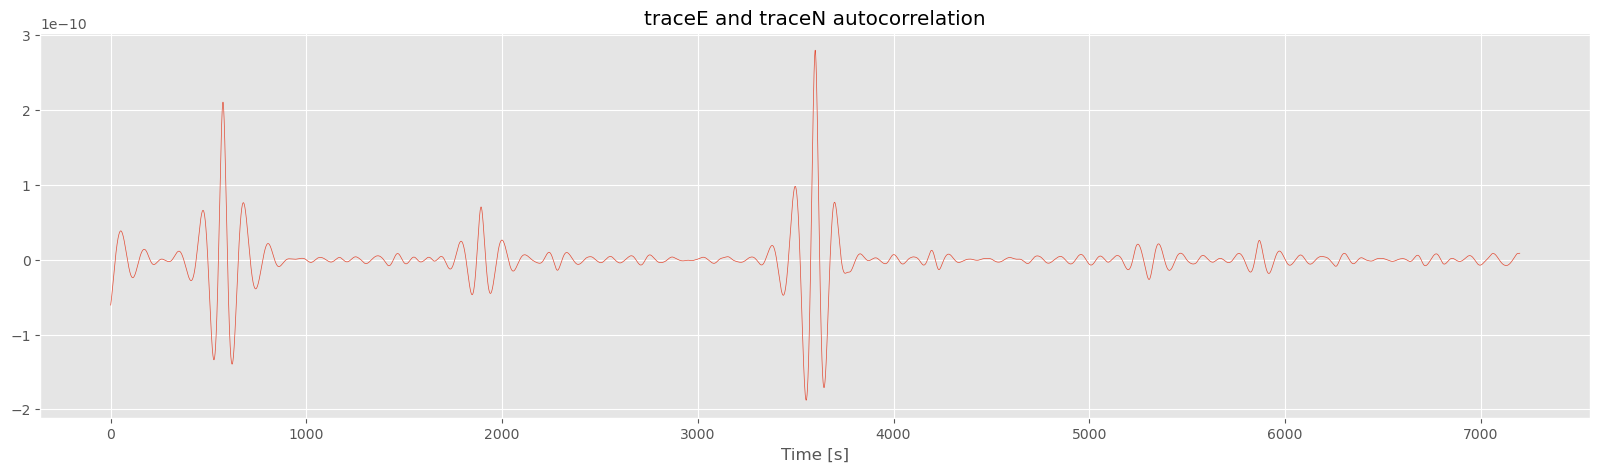

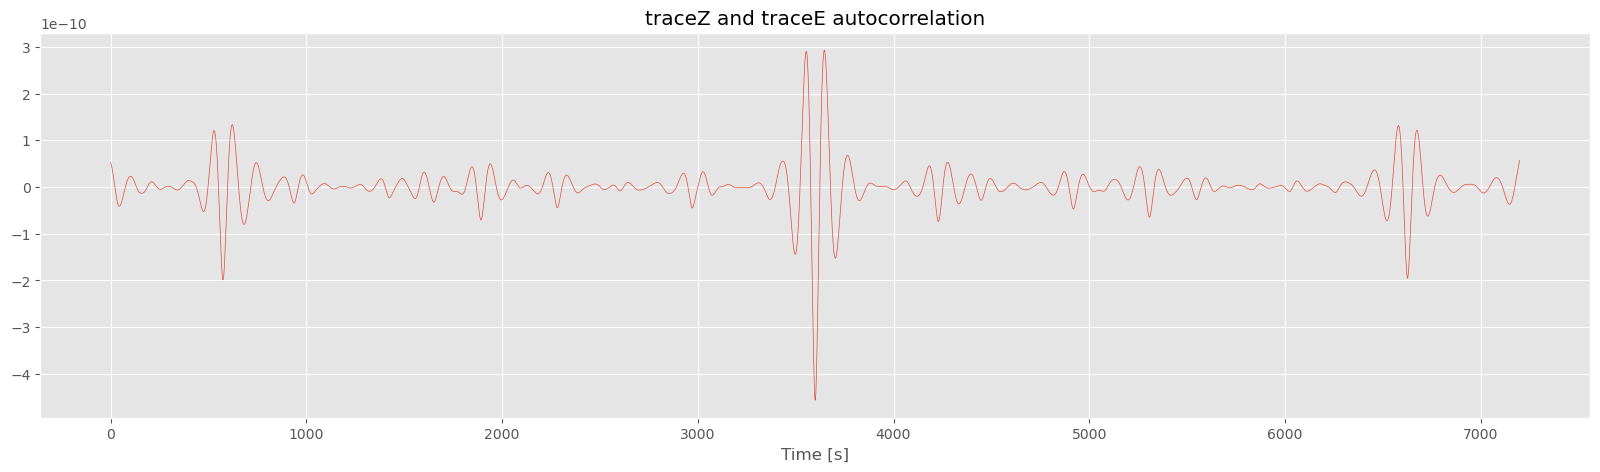

In [3]:
## 互相关
ZZ = np.correlate(traceZ.data, traceZ.data, 'same')
NZ = np.correlate(traceN.data, traceZ.data, 'same')
EN = np.correlate(traceE.data, traceN.data, 'same')
ZE = np.correlate(traceZ.data, traceE.data, 'same')

fig = plt.figure()
plt.plot(xticks, traceZ)
plt.xlabel('Time [s]'); plt.title('traceN raw signal'); plt.show()
plt.plot(xticks, ZZ)
plt.xlabel('Time [s]'); plt.title('traceZ autocorrelation'); plt.show()
plt.plot(xticks, NZ)
plt.xlabel('Time [s]'); plt.title('traceN and traceZ cross correlation'); plt.show()
plt.plot(xticks, EN)
plt.xlabel('Time [s]'); plt.title('traceE and traceN cross correlation'); plt.show()
plt.plot(xticks, ZE)
plt.xlabel('Time [s]'); plt.title('traceZ and traceE cross correlation'); plt.show()

## H/V

In [ ]:
## H/V
yf = {}
xf = fft.fftfreq(npts, delta)
yf['E'] = fft.fft(traceE)
yf['N'] = fft.fft(traceN)
yf['Z'] = fft.fft(traceZ)

def hv2(fE, fN, fZ):
    return np.square((fE**2 + fN**2) / fZ**2)

def hv1(fE, fN, fZ):
    return ((fE + fN)/2.) / fZ

y = hv2(yf['E'].real, yf['N'].real, yf['Z'].real)
y_smooth = signal.savgol_filter(y,53,3)

#yy = y[0:2::]

#plt.plot(yf['E'][0: npts//2])
plt.plot(xf[:npts//2], yf['E'][0: npts//2])
plt.ylim(-100, 100)
plt.xlabel('Frequence [Hz]')
plt.show()

In [ ]:
import scipy.io as io
io.savemat('data.mat', {"yf_E": yf['E'],
                        "yf_N": yf['N'],
                        "yf_Z": yf['Z'],
                        "xf": xf})

## hvsrpy

In [39]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import hvsrpy
from hvsrpy import utils

### Time Domain Settings
---

In [40]:

# Window length in seconds. In general low frequency peaks require longer window lengths.
# See the SESAME guidelines for specific window length recommendations.
windowlength = 60

# Boolean to control whether Butterworth filter is applied. 
# Geopsy does not apply a bandpass filter.
filter_bool = False        
# Low-cut frequency for bandpass filter.
filter_flow = 0.1                   
# High-cut frequency for bandpass filter.
filter_fhigh = 30                   
# Filter order.
filter_order = 5

# Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
width = 0.1

### Frequency Domain Settings
---

In [41]:
# Konno and Ohmachi smoothing constant. 40 is recommended.
bandwidth = 40
# Minimum frequency after resampling
resample_fmin = 0.1  
# Maximum frequency after resampling
resample_fmax = 8
# Number of frequencies after resampling 重采样后的频率数
resample_fnum = 200
# Type of resampling {'log', 'linear'}
resample_type = 'log'
# Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
peak_f_lower = None
peak_f_upper = None

### HVSR Settings
---

In [42]:
# Method for combining horizontal components {"squared-average", "geometric-mean", "single-azimuth"}.
# Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
method = "geometric-mean"
# If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
azimuth = 0

# Boolean to control whether frequency domain rejection proposed by Cox et al. (2020) is applied.
# Geopsy does not offer this functionality.
rejection_bool = True
# Number of standard deviations to consider during rejection. Smaller values will reject more windows -> 2 is recommended.
n = 2
# Maximum number of iterations to perform for rejection -> 50 is recommended.
max_iterations = 50

# Distribution of f0 {"lognormal", "normal"}. Geopsy default "normal" -> "lognormal" is recommended.
distribution_f0 = "lognormal"
# Distribution of mean curve {"lognormal", "normal"}. Geopsy default "lognormal" -> "lognormal" is recommended.
distribution_mc = "lognormal"

### Plot Settings
---

In [43]:
# Manually set the ylimits of the HVSR figures. Default is None so limits will be set automatically.
ymin, ymax = 0, 10

### Perform Calculation
---

Elapsed Time: 0.32 seconds

Statistics before rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.47,1.4
"Fundamental Site Period, T0",2.15,1.4



Analysis summary:


,
Window length,60s
No. of windows,119
Number of iterations to convergence,3 of 50 allowed
No. of rejected windows,6



Statistics after rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.40,1.28
"Fundamental Site Period, T0",2.49,1.28


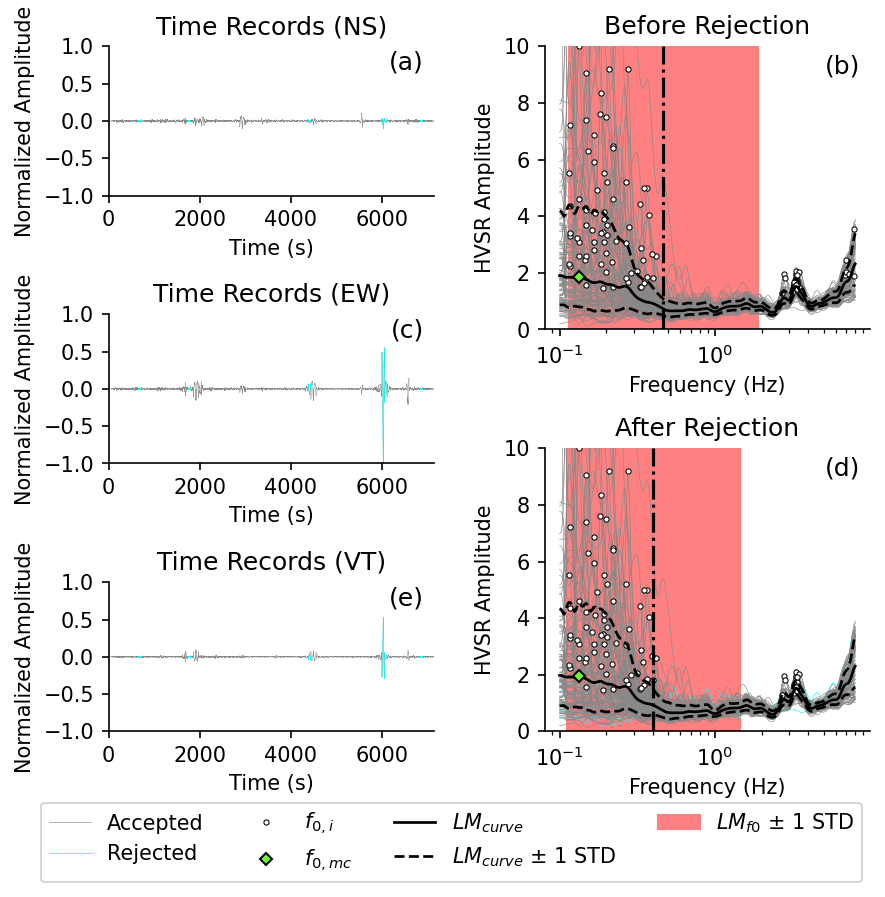

In [8]:

fig = plt.figure(figsize=(6,6), dpi=150)
gs = fig.add_gridspec(nrows=6,ncols=6)

ax0 = fig.add_subplot(gs[0:2, 0:3])
ax1 = fig.add_subplot(gs[2:4, 0:3])
ax2 = fig.add_subplot(gs[4:6, 0:3])

if rejection_bool:
    ax3 = fig.add_subplot(gs[0:3, 3:6])
    ax4 = fig.add_subplot(gs[3:6, 3:6])
else:
    ax3 = fig.add_subplot(gs[0:3, 3:6])
    ax4 = False

start = time.time()
sensor = hvsrpy.Sensor3c.from_mseed(file_name)
bp_filter = {"flag":filter_bool, "flow":filter_flow, "fhigh":filter_fhigh, "order":filter_order}
resampling = {"minf":resample_fmin, "maxf":resample_fmax, "nf":resample_fnum, "res_type":resample_type}
hv = sensor.hv(windowlength, bp_filter, width, bandwidth, resampling, method, f_low=peak_f_lower, f_high=peak_f_upper, azimuth=azimuth)
end = time.time()
print(f"Elapsed Time: {str(end-start)[0:4]} seconds")

individual_width = 0.3
median_width = 1.3
for ax, title in zip([ax3, ax4], ["Before Rejection", "After Rejection"]):
    # Rejected Windows
    if title=="After Rejection":
        if len(hv.rejected_window_indices):
            label = "Rejected"
            for amp in hv.amp[hv.rejected_window_indices]:
                ax.plot(hv.frq, amp, color='#00ffff', linewidth=individual_width, zorder=2, label=label)
                label=None
            
    # Accepted Windows
    label="Accepted"
    for amp in hv.amp[hv.valid_window_indices]:
        ax.plot(hv.frq, amp, color='#888888', linewidth=individual_width,
                label = label if title=="Before Rejection" else "")
        label=None
    
    # Window Peaks
    ax.plot(hv.peak_frq, hv.peak_amp, linestyle="", zorder=2,
            marker='o', markersize=2.5, markerfacecolor="#ffffff", markeredgewidth=0.5, markeredgecolor='k',
            label="" if title=="Before Rejection" and rejection_bool else r"$f_{0,i}$")
    
    # Peak Mean Curve
    ax.plot(hv.mc_peak_frq(distribution_mc), hv.mc_peak_amp(distribution_mc), linestyle="", zorder=4,
            marker='D', markersize=4, markerfacecolor='#66ff33', markeredgewidth=1, markeredgecolor='k', 
            label = "" if title=="Before Rejection" and rejection_bool else r"$f_{0,mc}$")
    
    # Mean Curve
    label = r"$LM_{curve}$" if distribution_mc=="lognormal" else "Mean"   
    ax.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=median_width,
            label="" if title=="Before Rejection" and rejection_bool else label)
    
    # Mean +/- Curve
    label = r"$LM_{curve}$"+" ± 1 STD" if distribution_mc=="lognormal" else "Mean ± 1 STD"
    ax.plot(hv.frq, hv.nstd_curve(-1, distribution_mc),
            color='k', linestyle='--', linewidth=median_width, zorder=3,
            label = "" if title=="Before Rejection" and rejection_bool else label)
    ax.plot(hv.frq, hv.nstd_curve(+1, distribution_mc),
            color='k', linestyle='--', linewidth=median_width, zorder=3)

    # f0 +/- STD
    if ymin is not None and ymax is not None:
        ax.set_ylim((ymin, ymax))
    label = r"$LM_{f0}$"+" ± 1 STD" if distribution_f0=="lognormal" else "Mean f0 ± 1 STD"    
    _ymin, _ymax = ax.get_ylim()
    ax.plot([hv.mean_f0_frq(distribution_f0)]*2, [_ymin, _ymax], linestyle="-.", color="#000000")
    ax.fill([hv.nstd_f0_frq(-1, distribution_f0)]*2 + [hv.nstd_f0_frq(+1, distribution_f0)]*2, [_ymin, _ymax, _ymax, _ymin], 
            color = "#ff8080",
            label="" if title=="Before Rejection" and rejection_bool else label)
    ax.set_ylim((_ymin, _ymax))
    
    ax.set_xscale('log')
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("HVSR Amplitude")
    if rejection_bool:
        if title=="Before Rejection":
            print("\nStatistics before rejection:")
            hv.print_stats(distribution_f0)
            c_iter = hv.reject_windows(n, max_iterations=max_iterations, 
                                       distribution_f0=distribution_f0, distribution_mc=distribution_mc)
        elif title=="After Rejection":
            fig.legend(ncol=4, loc='lower center', bbox_to_anchor=(0.51, 0), columnspacing=2)

            print("\nAnalysis summary:")  
            display(pd.DataFrame(columns=[""], index=["Window length", "No. of windows", "Number of iterations to convergence", "No. of rejected windows"], 
                    data=[f"{windowlength}s", str(sensor.ns.nseries), f"{c_iter} of {max_iterations} allowed", str(sum(hv.rejected_window_indices))]))            
            print("\nStatistics after rejection:")
            hv.print_stats(distribution_f0)
    else:
        display(pd.DataFrame(columns=[""], index=["Window length", "No. of windows"], 
                         data=[f"{windowlength}s", str(sensor.ns.nseries)]))
        hv.print_stats(distribution_f0)
        fig.legend(loc="upper center", bbox_to_anchor=(0.77, 0.4))
        break
    ax.set_title(title)

norm_factor = sensor.normalization_factor
for ax, timerecord, name in zip([ax0,ax1,ax2], [sensor.ns, sensor.ew, sensor.vt], ["NS", "EW", "VT"]):
    ctime = timerecord.time
    amp = timerecord.amp/norm_factor
    ax.plot(ctime.T, amp.T, linewidth=0.2, color='#888888')
    ax.set_title(f"Time Records ({name})")
    ax.set_yticks([-1, -0.5, 0, 0.5, 1])
    ax.set_xlim(0, windowlength*timerecord.nseries)
    ax.set_ylim(-1, 1)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Normalized Amplitude')
    ax.plot(ctime[hv.rejected_window_indices].T, amp[hv.rejected_window_indices].T, linewidth=0.2, color="cyan")

if rejection_bool:
    axs = [ax0, ax3, ax1, ax4, ax2]
else:
    axs = [ax0, ax3, ax1, ax2]
    
for ax, letter in zip(axs, list("abcde")):    
    ax.text(0.97, 0.97, f"({letter})", ha="right", va="top", transform=ax.transAxes, fontsize=12)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)


fig.tight_layout(h_pad=1, w_pad=2, rect=(0,0.08,1,1))
plt.show()

## specgram

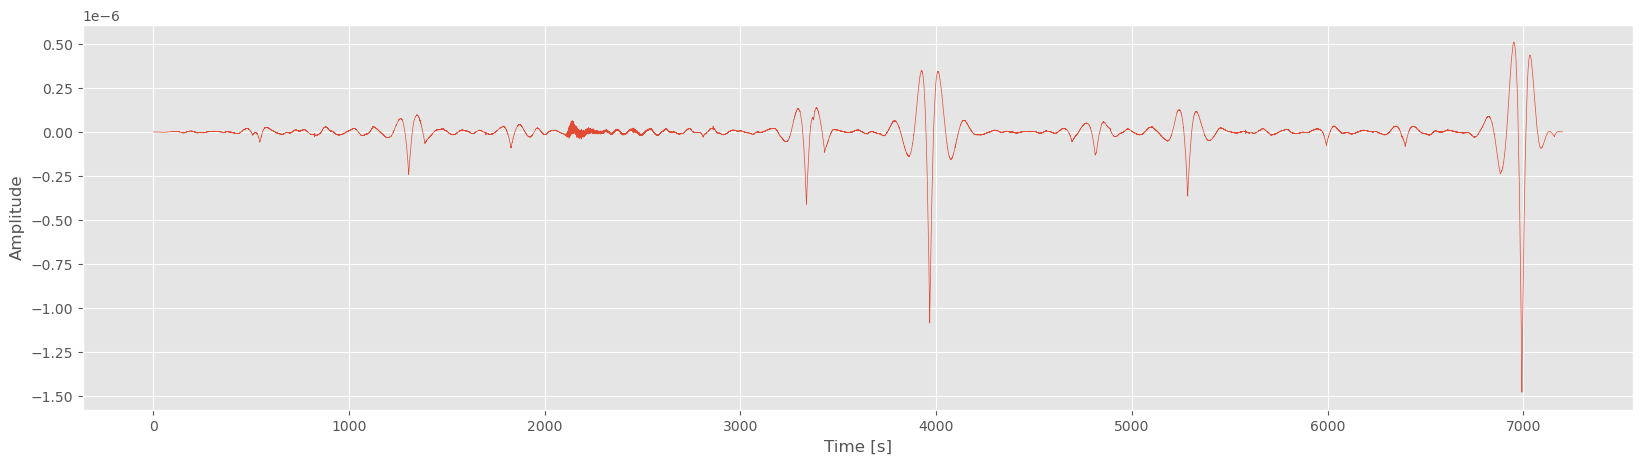

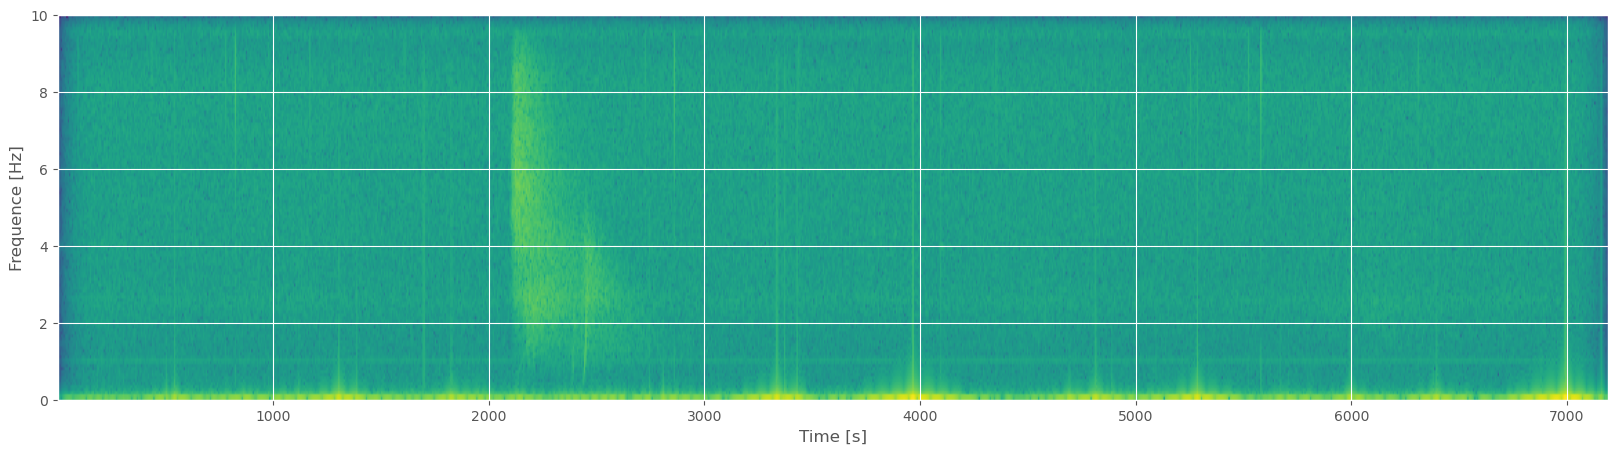

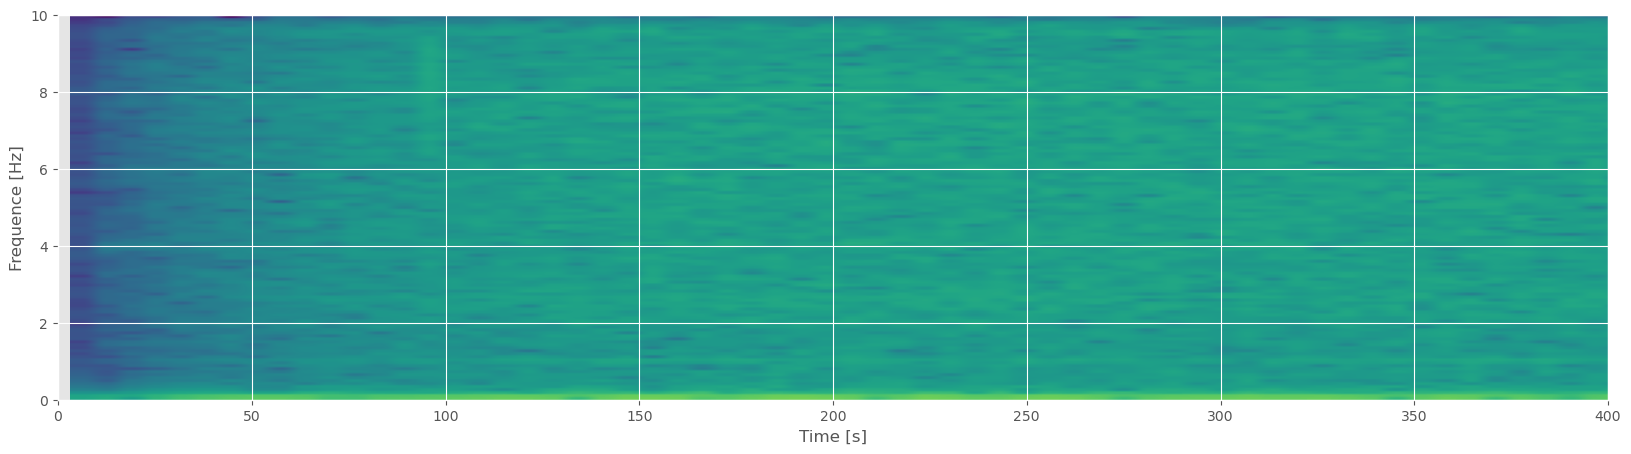

In [4]:
## plot
utils.plot_time(xticks, data)
utils.specgram(data, fs)


def specgram1(data, fs):
    ## plt specgram
    Pxx, freqs, bins, im = plt.specgram(data, Fs=fs)
    plt.xlabel('Time [s]')
    plt.ylabel('Frequence [Hz]')
    plt.xlim(0, 400)
    plt.show()
    
specgram1(data, fs)

#utils.plot_freq(data, delta)

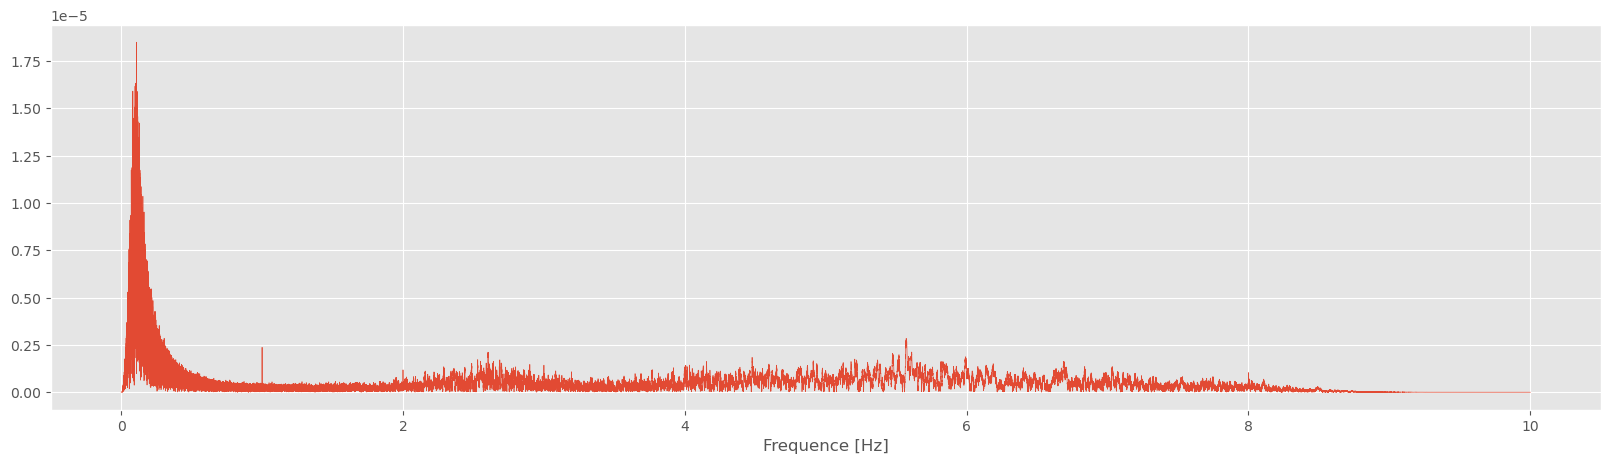

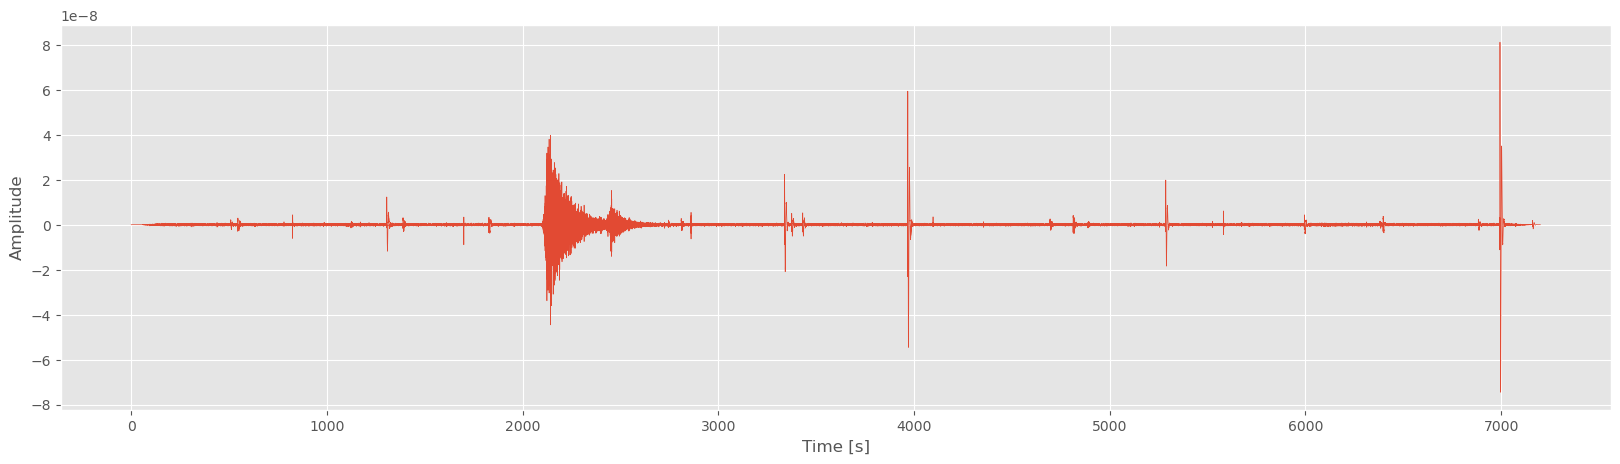

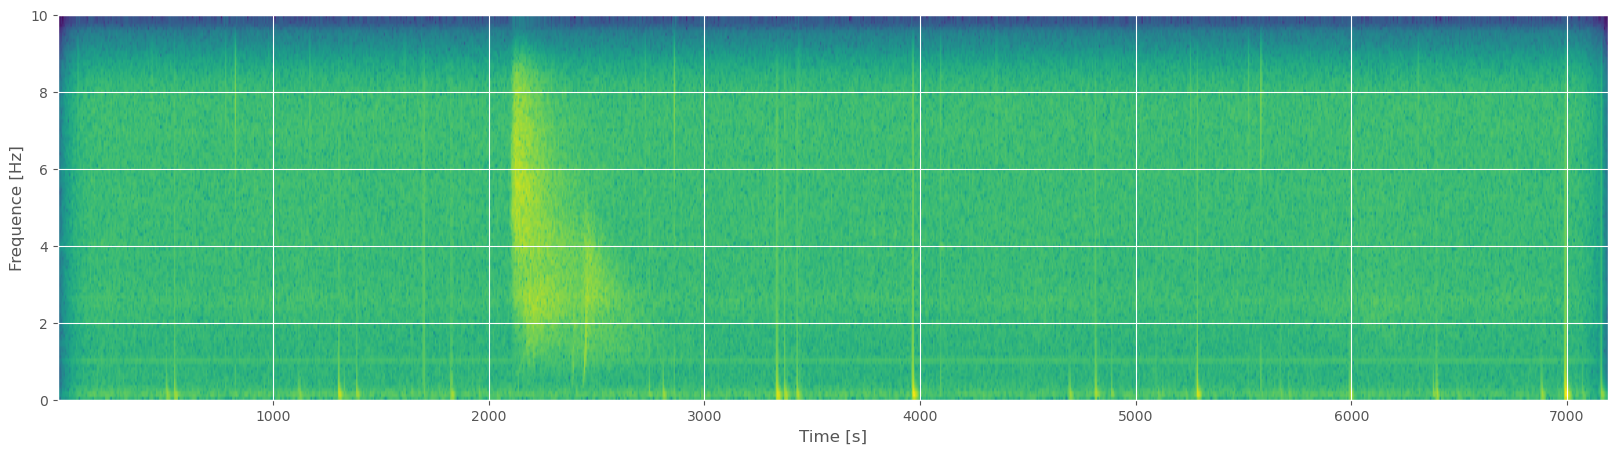

In [5]:
## 滤波
copy_traceZ = traceZ.copy()
copy_traceZ.filter('bandpass', freqmin=0.1, freqmax=8)

utils.plot_freq( copy_traceZ.data, delta)
utils.plot_time(xticks, copy_traceZ.data)
utils.specgram(copy_traceZ.data, fs)

## PSD
---

In [104]:
solars.keys()

dict_keys(['S0311b', 'S0252a', 'S0248b', 'S0430c', 'S0342a', 'S0372a', 'S0247a', 'S0257b', 'S0227d', 'S0219c', 'S0247b', 'S0378b', 'S0216a', 'S0888b', 'S0255b', 'S0216b', 'S0222a', 'S0265e', 'S0871b', 'S1075c', 'S0827a', 'S0248a', 'S0868c', 'S0367c', 'S0325d', 'S0946a', 'S0429c', 'S0314a', 'S0940a', 'S0325c', 'S0323c', 'S1192a', 'S0194c', 'S0321a', 'S0263c', 'S0408b', 'S0366c', 'S1087d', 'S0899b', 'S1106a', 'S0418a', 'S0417a', 'S0394a', 'S0264b', 'S0460a', 'S0338b', 'S0875c', 'S0229a', 'S0477a', 'S0327a'])

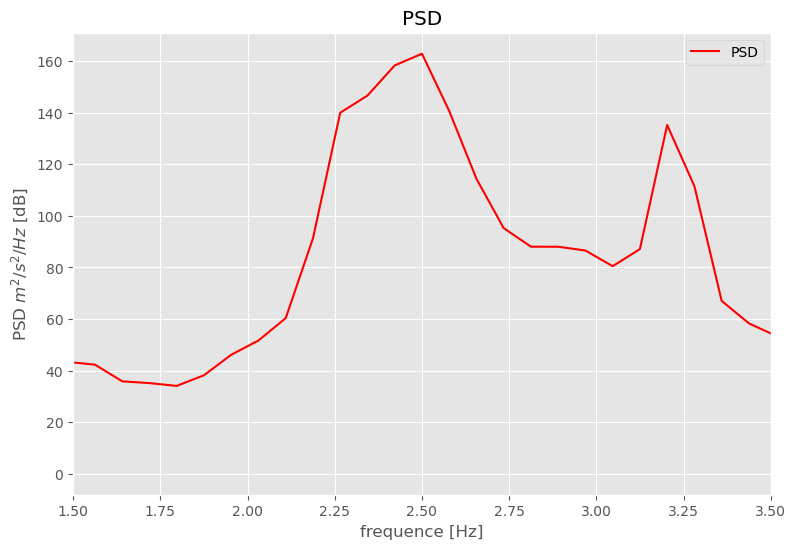

In [141]:
import scipy.signal as signal
import obspy
import os
import utils
import matplotlib.pyplot as plt
import numpy as np

## load inSight data to solar
solars = utils.Solar('2.4', 'B').get_solar()
solar = solars['S0314a']

trace_Z = solar['raw'][0]

trace_Z.filter('bandpass', freqmin=0.5, freqmax=4.5)


data_PSD = signal.welch(trace_Z.data, fs=trace_Z.stats.sampling_rate)
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(data_PSD[0], data_PSD[1], 'r-', label='PSD')
    ax.set_xlabel('frequence [Hz]')
    ax.set_ylabel('PSD $m^2/s^2/Hz$ [dB]')

    ax.set_xlim(1.50, 3.50)

    ax.set_title('PSD')
    ax.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


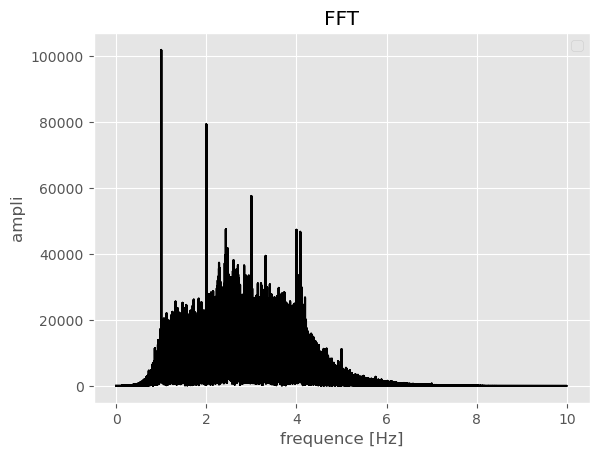

In [129]:
x_frq = np.fft.fftfreq(len(trace_Z.data), d=trace_Z.stats.delta)
y_frq = np.fft.fft(trace_Z.data)
plt.plot(np.abs(x_frq), np.abs(y_frq), 'k')
plt.xlabel('frequence [Hz]')
plt.ylabel('ampli')
#plt.yscale('log')
#plt.xscale('log')
plt.title('FFT')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 生成一维信号
t = np.linspace(0, 1, 1000, endpoint=False)
x = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t) + np.random.randn(t.size)

# 计算功率谱密度
f, Pxx = signal.welch(x, fs=1000, nperseg=256)

# 绘制功率谱密度图像
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(t, x)
ax2 = fig.add_subplot(212)
ax2.plot(f, Pxx)
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('PSD [V**2/Hz]')
plt.show()


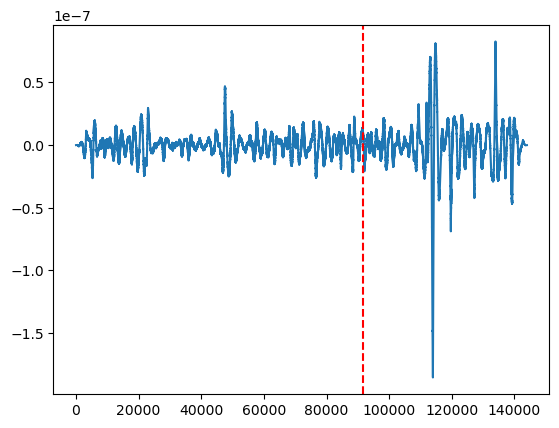

In [77]:
## signal 获得一维数组的极大值， 极小值
peaks_idxs = signal.find_peaks(trace_Z)
idx = peaks_idxs[0][30000]

plt.plot(trace_Z.data)
plt.axvline(x=idx, color='red', linestyle='--')


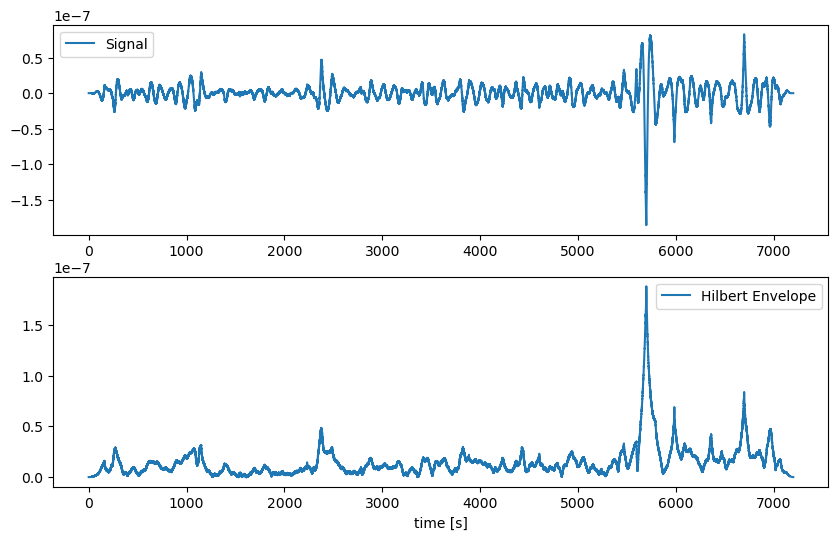

In [85]:
# 计算包络
t = np.arange(0, trace_Z.stats.npts * trace_Z.stats.delta, trace_Z.stats.delta)
x = trace_Z.data
analytic_signal = signal.hilbert(x)
amplitude_envelope = np.abs(analytic_signal)

# 绘制信号和包络
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs[0].plot(t, x, label='Signal')
axs[1].plot(t, amplitude_envelope, label='Hilbert Envelope')

axs[0].legend()
axs[1].legend()

plt.xlabel('time [s]')
plt.show()